### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


# New Section

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 # Display the DataFrame

 df = pd.read_csv('/content/The E-commerce Dataset.csv')
 df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [3]:
# Counting number of Null values in each column

print(df.isnull().sum())

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [4]:
# Print the length of the data before removing missing data

print('the length of the data:',len(df))

the length of the data: 20000


In [5]:
# Removing the missing data

df_clean = df.dropna(subset=['gender', 'rating', 'helpfulness'])

In [6]:
# Removing review is 'none'

df_clean = df_clean[df_clean['review'] != 'none']

In [7]:
# Counting number of Null values in each column after removing missing data

print(df_clean.isnull().sum())

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64


In [8]:
# Print the length of the data after removing missing data

print('the length of the data:',len(df_clean))

the length of the data: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [9]:
# your code and solutions
#Q2.1 total number of unique users, unique reviews, unique items, and unique categories

total_unique_users = df_clean['userId'].nunique()
print("Total number of unique users:", total_unique_users)

total_unique_reviews = df_clean['review'].nunique()
print("Total number of unique reviews:", total_unique_reviews)

total_unique_items = df_clean['item'].nunique()
print("Total number of unique items:", total_unique_items)

total_unique_categories = df_clean['category'].nunique()
print("Total number of unique categories:", total_unique_categories)

Total number of unique users: 8562
Total number of unique reviews: 19459
Total number of unique items: 89
Total number of unique categories: 9


In [10]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

df_clean.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [13]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

gender_item_num = df_clean.groupby(['gender'])['item'].count().reset_index(name='count')
gender_item_num.head()
gender_item_num['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [14]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

items = df_clean.groupby('item')
items.rating.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.00,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.00,4.0,5.0,5.0
Alta Vista (by 1stUp),157.0,3.541401,1.263341,1.0,3.00,4.0,4.0,5.0
Amazon.com,240.0,3.683333,1.571095,1.0,2.00,4.0,5.0,5.0
American Airlines,185.0,3.054054,1.417015,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,210.0,3.971429,1.093322,1.0,3.25,4.0,5.0,5.0
What Lies Beneath,160.0,3.450000,1.201676,1.0,3.00,3.5,4.0,5.0
X-Men,245.0,4.118367,0.853074,1.0,4.00,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

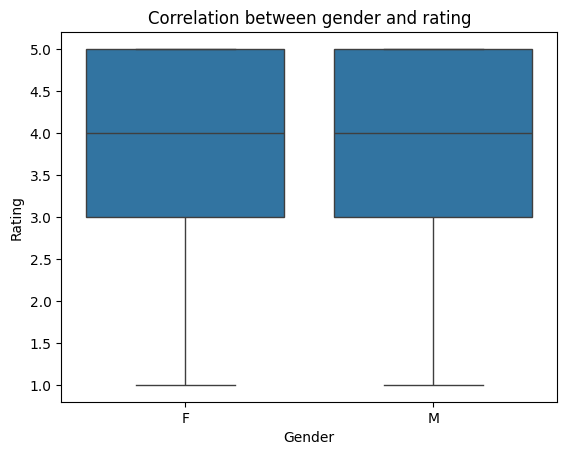

In [15]:
# your code and solutions
# The correlation between gender and rating
sns.boxplot(x='gender', y='rating', data=df_clean)
plt.title('Correlation between gender and rating')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

# **Observations and explanations**
**Correlation between gender and rating**
This plot comapres the distribution of rating between male and female users.The rating distribution is similar to for male and female. The mean for both of the users are 4.0. So, we can say that the gender of the users does not affect the rating.

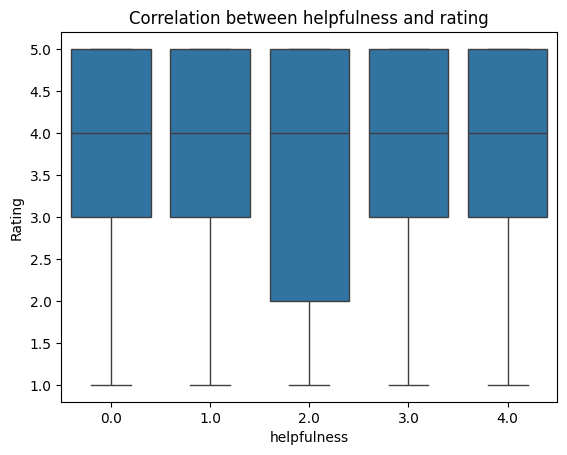

In [16]:
# The correlation between helpfulness and rating

sns.boxplot(x='helpfulness', y='rating', data=df_clean)
plt.title('Correlation between helpfulness and rating')
plt.xlabel('helpfulness')
plt.ylabel('Rating')
plt.show()

# **Observations and explanations**
**Correlation between helpfulness and rating**
The mean of the helpfulness is 4. Minimum rating is 1 and maximum rating is 5. Other than that the avagare helpfulness which is 2.0 is diffrent from others. From this plot box we can tell that the impact of helpfullness is showing on ratings.

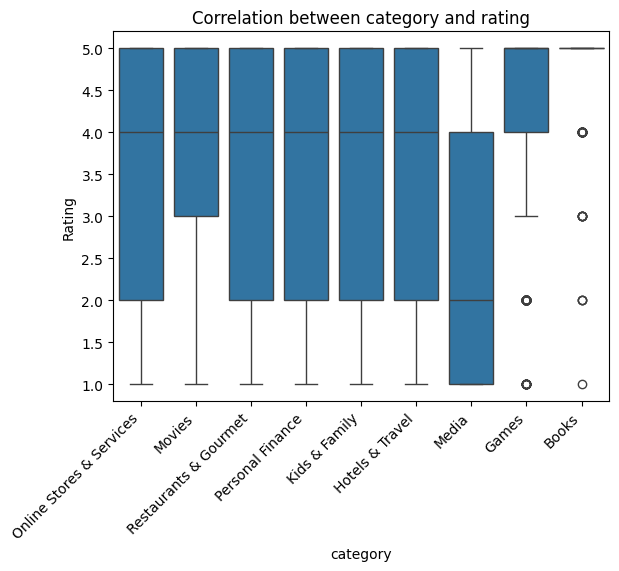

In [17]:
# The correlation between category and rating

sns.boxplot(x='category', y='rating', data=df_clean)
plt.title('Correlation between category and rating')
plt.xlabel('category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Observations and explanations**
**Correlation between category and rating**



* This boxplot shows the rating for Online Stores and Services, Restaurants and Gourmet, Personal Finance, Kids and Family and Hotels and Travels are same. Maximum rating is 5 and minimum rating is 2.  
* for Media boxlot its showing that it has received lower rating than other catagories and its median is 2

*  In the case of Movies the highest rating is 5 and lowest rating is 1, the median is 4
*  The boxplot of Games shows that the maximu rating is 5 and minimum rating is 3.

* There is no boxplot is showing for books









#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [18]:
# your code and solutions
#reviews of which the helpfulness is no more than 2

df_clean_helpfulness = df_clean.drop(df_clean.index[(df_clean['helpfulness']<=2)])
df_clean_helpfulness.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22


In [19]:
#users who rate less than 7 items

users_count = df_clean_helpfulness['userId'].value_counts()

remove_outlier_users_count = users_count[users_count>=7].index

df_clean_users = df_clean_helpfulness[df_clean_helpfulness['userId'].isin(remove_outlier_users_count)].reset_index()
df_clean_users.head()

,index,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [20]:
#items that receives less than 11 ratings

items_count = df_clean_users['item'].value_counts()

remove_outlier_items_count = items_count[items_count >=11].index

df_clean_items = df_clean_users[df_clean_users['item'].isin(remove_outlier_items_count)].reset_index()
df_clean_items.head()


,level_0,index,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,0,78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,1,80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,2,81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,3,82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4,83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [21]:
#print the length of the data

print("The length of the data:",len(df_clean_items))

The length of the data: 2685
